In [1]:
import pandas as pd

In [2]:
price = pd.read_csv("Toyota_Corola.csv")

In [3]:
price.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [4]:
price = price.drop(['Id','Model'],axis=1)

In [5]:
price.head()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170


In [6]:
from statsmodels.graphics.regressionplots import influence_plot

In [7]:
import statsmodels.formula.api as smf

In [8]:
model = smf.ols("Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight",data=price).fit()

In [9]:
model.params

Intercept    -410.845504
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Cylinders   -1643.382016
Gears         622.282925
Weight         18.609651
dtype: float64

In [10]:
model.pvalues

Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Cylinders     1.181900e-07
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64

In [11]:
model = smf.ols("Price~Age_08_04+KM+HP+Cylinders+Gears+Weight",data=price).fit()

In [12]:
model.pvalues

Intercept     9.925271e-08
Age_08_04    2.772608e-290
KM            1.985300e-56
HP            1.496107e-26
Cylinders     9.925271e-08
Gears         1.132207e-03
Weight       2.904479e-101
dtype: float64

## Now all. values are under significance level

In [13]:
model.rsquared_adj

0.86231709447668

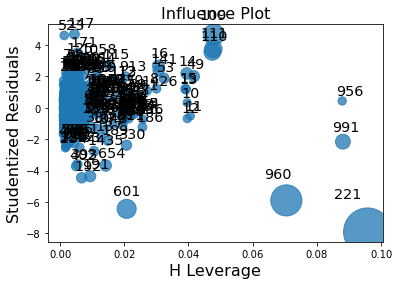

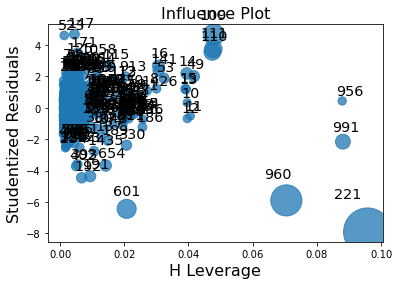

In [14]:
influence_plot(model)

## Removing indexes by seeing values in influence plot

In [18]:
price = price.drop(index = [960,221])

In [19]:
model = smf.ols("Price~Age_08_04+KM+HP+Cylinders+Gears+Weight",data=price).fit()

In [20]:
model.rsquared_adj

0.8721803764780234

In [21]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [25]:
import numpy as np

## Further improving model by removing data points from seeing cooks distance

In [26]:
(np.argmax(c),np.max(c))

(600, 0.18257171982190107)

In [27]:
price = price.drop(index = [600])

In [28]:
model = smf.ols("Price~Age_08_04+KM+HP+Cylinders+Gears+Weight",data=price).fit()

In [29]:
model.rsquared_adj

0.8724042628235301